In [1]:
import pandas as pd
df=pd.read_csv('Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [2]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [3]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
numerical=df.select_dtypes(include=['number']).columns
numerical

Index(['Age', 'Years of Experience', 'Salary'], dtype='object')

In [6]:
categorical=df.select_dtypes(include=['object']).columns
categorical

Index(['Gender', 'Education Level', 'Job Title'], dtype='object')

In [7]:
df[numerical]=df[numerical].fillna(df[numerical].median())

In [8]:
df[categorical]=df[categorical].fillna('unknown')

In [9]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [10]:

from sklearn.preprocessing import LabelEncoder
label={}
for col in categorical:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    label[col]=le
df.head()    

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,177,5.0,90000.0
1,28.0,0,3,18,3.0,65000.0
2,45.0,1,5,145,15.0,150000.0
3,36.0,0,0,116,7.0,60000.0
4,52.0,1,3,26,20.0,200000.0


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

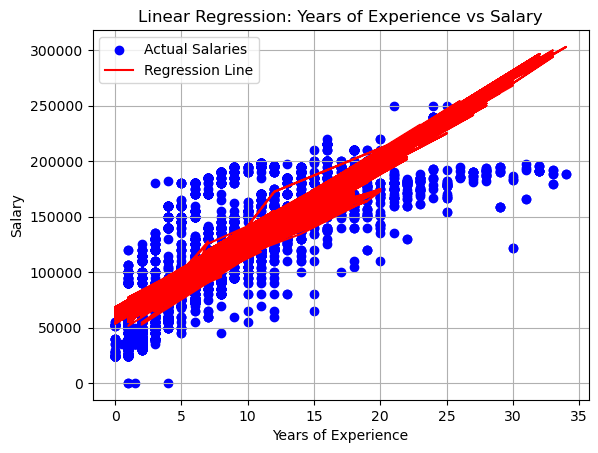

In [13]:

X=df[['Age','Education Level','Years of Experience']]
y=df['Salary'] 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


# Scatter plot (Actual Salaries)
plt.scatter(X['Years of Experience'], y, color='blue', label="Actual Salaries")

# Regression line (Predicted Salaries)
plt.plot(X['Years of Experience'], model.predict(X), color='red', label="Regression Line")

plt.title("Linear Regression: Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid()
plt.show()




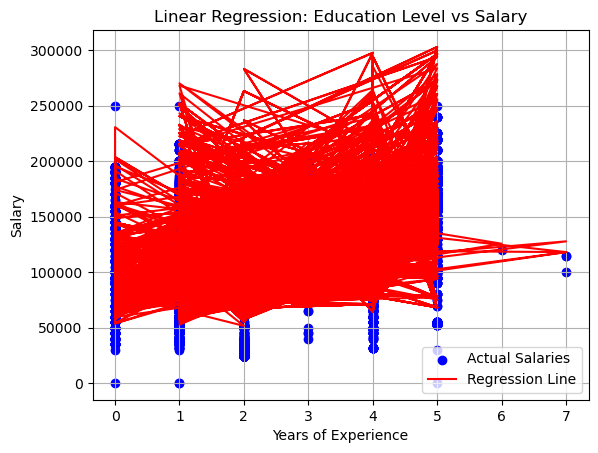

In [15]:
plt.scatter(X['Education Level'], y, color='blue', label="Actual Salaries")

# Regression line (Predicted Salaries)
plt.plot(X['Education Level'], model.predict(X), color='red', label="Regression Line")

plt.title("Linear Regression: Education Level vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid()
plt.show()

In [ ]:
df

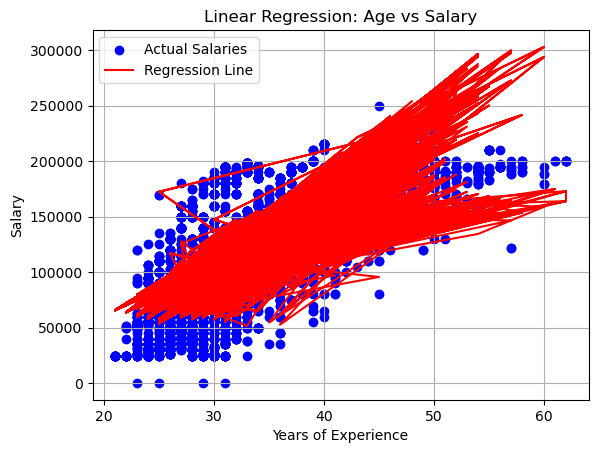

In [19]:
plt.scatter(X['Age'], y, color='blue', label="Actual Salaries")

# Regression line (Predicted Salaries)
plt.plot(X['Age'], model.predict(X), color='red', label="Regression Line")

plt.title("Linear Regression: Age vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid()
plt.show()